# Directed Search: Scenario discovery & trade-off analysis

Scenario discovery and trade-off analysis are used to detect the vulnerabilities of candidate solutions. Patient Rule Induction Method (PRIM) is used to identify policy vulnerabilities. For this analysis the results of the uncertainty analysis model simulation are applied. In this simulation, the 9 policies of interest are evaluated under 5000 scenarios.

The findings of this analysis step are discussed in the report in chapter 3.2.4.


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
from ema_workbench import MultiprocessingEvaluator, ema_logging
from ema_workbench import Samplers
from ema_workbench.em_framework import get_SALib_problem
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt


In [2]:
from SALib.analyze.sobol import analyze

### Importing results

In [3]:
experiments = pd.read_csv('data/output_data/MOEA_uncertainty_experiments.csv')
outcomes = pd.read_csv('data/output_data/MOEA_uncertainty_outcomes.csv')

## 1. PRIM

Below scenario discovery has been applied again, just like 3.1.1, using PRIM. For this PRIM analysis two objectives are chosen; Expected number of deaths and Expected annual damage. First constraints are set for the objectives to select the preferred cases. These constraints are meant to select the worst possible cases to identify the effects of uncertainties. Based on this analysis a box is chosen with specific values of coverage and density. In this selection a rule of thumb is used which states that the density height should be at least 0.8. The outcomes of the selected boxes should indicate whether and which uncertainties influence the outcomes of the objectives.







In [4]:
# Find uncertainty_experiments
# A list has been created of uncertainties in the model
list_of_uncertainties = ['discount rate 0','discount rate 1','discount rate 2',\
'A.0_ID flood wave shape',
'A.1_Bmax','A.1_pfail','A.1_Brate',\
'A.2_Bmax','A.2_pfail','A.2_Brate',\
'A.3_Bmax','A.3_pfail','A.3_Brate',\
'A.4_Bmax','A.4_pfail','A.4_Brate',\
'A.5_Bmax','A.5_pfail','A.5_Brate',]

#experiments onbekend is nog niet duidelijk welke dataset hier gebruikt wordt.
uncertainty_experiments = experiments.loc[:,list_of_uncertainties]
uncertainty_experiments

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
0,4.5,2.5,2.5,73,237.223619,0.822949,10.0,257.939688,0.503687,1.0,191.079508,0.164219,10.0,333.137039,0.137691,1.5,308.535844,0.320555,10.0
1,4.5,4.5,4.5,100,217.582195,0.605151,1.0,247.388211,0.312620,1.0,53.665794,0.607444,1.0,77.572135,0.880944,10.0,123.840607,0.030363,10.0
2,4.5,4.5,2.5,102,330.365728,0.536505,10.0,199.599995,0.796105,10.0,290.208831,0.441010,1.5,108.515397,0.406332,1.0,135.264802,0.874969,1.0
3,3.5,2.5,2.5,38,198.899576,0.863812,10.0,67.180982,0.254501,1.0,199.763387,0.578495,1.0,264.949695,0.584395,1.5,166.317982,0.503127,1.0
4,2.5,1.5,2.5,95,259.903908,0.430111,1.5,116.302986,0.715382,1.5,258.385764,0.948641,1.0,238.644528,0.068021,10.0,47.039683,0.064501,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.5,1.5,3.5,25,333.392351,0.182541,1.5,200.358237,0.491426,10.0,181.191046,0.197216,10.0,229.783826,0.943458,1.0,129.641191,0.827044,10.0
49996,3.5,1.5,1.5,36,83.039895,0.946074,1.0,49.079330,0.391886,1.5,226.166062,0.208701,1.5,266.376350,0.701086,1.5,109.959418,0.742462,1.5
49997,3.5,2.5,2.5,35,331.179930,0.183885,1.0,123.736414,0.144689,10.0,104.541520,0.233693,1.5,158.196596,0.429540,1.0,325.853642,0.245758,1.0
49998,4.5,2.5,1.5,42,223.895330,0.887494,1.0,211.866952,0.594167,1.0,331.685061,0.086604,10.0,55.981291,0.168949,10.0,33.237808,0.604592,10.0


### 1.2 Expected Number of Deaths

For the objective of Expected number of deaths a contrain is set to bigger than 0.001 meaning that only the cases with more than 0 deaths are selected. The threshold is kept at 0.8 for this analysis.

[MainProcess/INFO] 50000 points remaining, containing 8984 cases of interest
[MainProcess/INFO] mean: 0.855984555984556, mass: 0.0518, coverage: 0.24677203918076582, density: 0.855984555984556 restricted_dimensions: 1


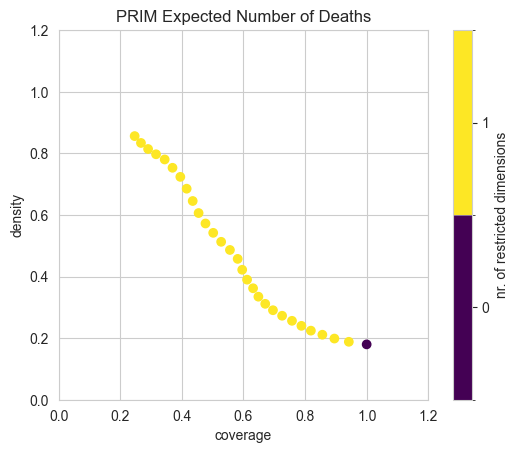

In [14]:
# applying PRIM to the worst outcomes for the expected number of deaths (highest number of deaths)
x = uncertainty_experiments
y = outcomes['Expected Number of Deaths'] > 0.001 #amount of death to be lowest as possible

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.title("PRIM Expected Number of Deaths")
plt.show()

Based on these outcomes, a box with specific density and coverage values has to be selected to capture the desired cases. In this selection process a minimal density value of 0.8 was used which resulted in the selection of box 26 with a density value of 0.814.

coverage     0.290405
density      0.814041
id          26.000000
mass         0.064100
mean         0.814041
res_dim      1.000000
Name: 26, dtype: float64

             box 26                            
                min       max qp value qp value
A.1_pfail  0.000088  0.064123      NaN      0.0



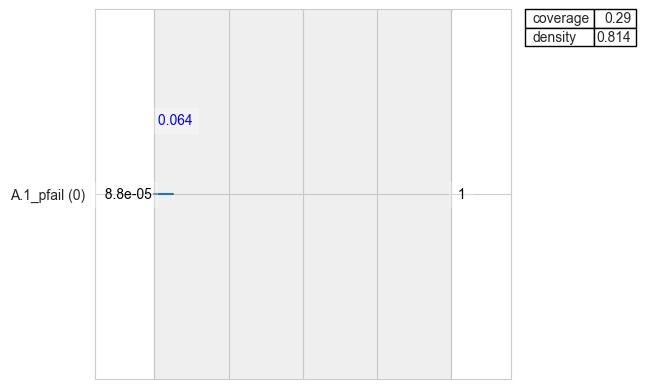

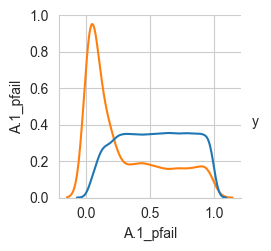

In [6]:
#Here the box is selected based on the density value of 0.8
box1.inspect(26)
box1.inspect(26, style="graph")
box1.show_pairs_scatter(26)
plt.show()

This PRIM analyses is solely focused on the objective of Expected number of deaths. The results indicate that there is just one uncertainty that influences the outcome of this objective. This uncertainty is A.1_pfail which represents the fail of dike ring 1. The qp value for this uncertainty is 0.0 meaning that it is below 0.05. Therefore it can be concluded that this uncertainty does influence the outcome of the objective Expected number of deaths.

### 1.2 Expected Annual Damage

Constrain for the objective Expected annual damage is framed in a different form. Here the worst 10% of the cases is selected using the percentile function. If the threshold is kept at 0.8 no cases are located in the boxes. This is probably due to outliers in the data which increase the range. For this reason the threshold for the analysis of this objective is set to 0.5.







[MainProcess/INFO] 50000 points remaining, containing 5000 cases of interest
[MainProcess/INFO] mean: 0.749034749034749, mass: 0.0518, coverage: 0.388, density: 0.749034749034749 restricted_dimensions: 1


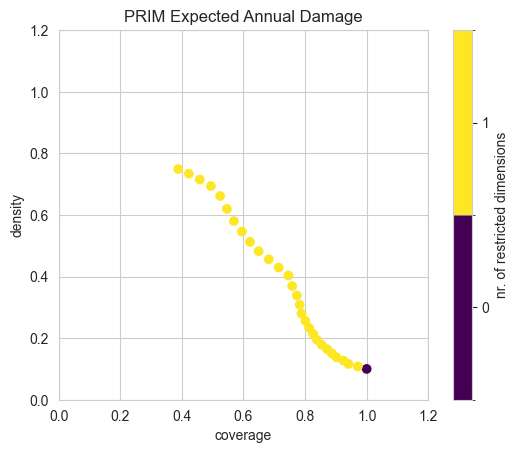

In [15]:
x = uncertainty_experiments
y = outcomes['Expected Annual Damage'] > np.percentile(outcomes['Expected Annual Damage'],90) #

prim_alg = prim.Prim(x, y, threshold=0.5, peel_alpha=0.1)
box2 = prim_alg.find_box()

box2.show_tradeoff()
plt.title('PRIM Expected Annual Damage')
plt.show()

The results of this situation are different than those of the other objective. For this objective the rule of thumb in which the density should be at 0.8 doesn't apply for the boxes. Therefore, the box with the highest level of density is selected which is box 28.

coverage     0.388000
density      0.749035
id          28.000000
mass         0.051800
mean         0.749035
res_dim      1.000000
Name: 28, dtype: float64

             box 28                            
                min       max qp value qp value
A.1_pfail  0.000088  0.051808      NaN      0.0



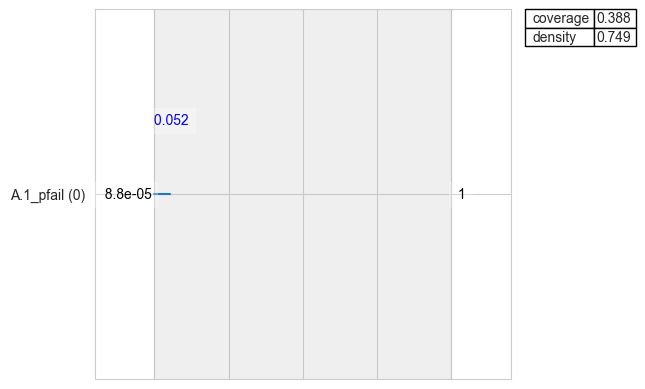

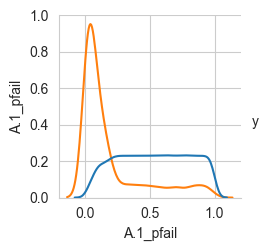

In [10]:
box1.inspect(28)
box1.inspect(28, style="graph")
box1.show_pairs_scatter(28)
plt.show()

Again solely the uncertainty of A1_pfail seems to influence the outcome of the objective Expected annual damage.
The qp value for this uncertainty is 0 which is lower than 0.05 and indicating that the uncertainty is significant.
This leads to the overall conclusion that both the Expected number of deaths and the Expected annual damage is
influenced by the uncertainty of the fail of dike ring 1. Rijkswaterstaat should utilize these insights as input for
further discussion around the policy options.